Epoch 1/30
3/3 [==============================] - 2s 176ms/step - loss: 2.6348 - accuracy: 0.2083 - val_loss: 2.6293 - val_accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - 0s 25ms/step - loss: 2.6279 - accuracy: 0.3333 - val_loss: 2.6228 - val_accuracy: 0.3889
Epoch 3/30
3/3 [==============================] - 0s 22ms/step - loss: 2.6212 - accuracy: 0.4722 - val_loss: 2.6159 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 23ms/step - loss: 2.6142 - accuracy: 0.5278 - val_loss: 2.6087 - val_accuracy: 0.7222
Epoch 5/30
3/3 [==============================] - 0s 22ms/step - loss: 2.6071 - accuracy: 0.6944 - val_loss: 2.6013 - val_accuracy: 0.7222
Epoch 6/30
3/3 [==============================] - 0s 22ms/step - loss: 2.5998 - accuracy: 0.6944 - val_loss: 2.5935 - val_accuracy: 0.7222
Epoch 7/30
3/3 [==============================] - 0s 22ms/step - loss: 2.5921 - accuracy: 0.6944 - val_loss: 2.5856 - val_accuracy: 0.7222
Epoch 8/30
3/3 [==========

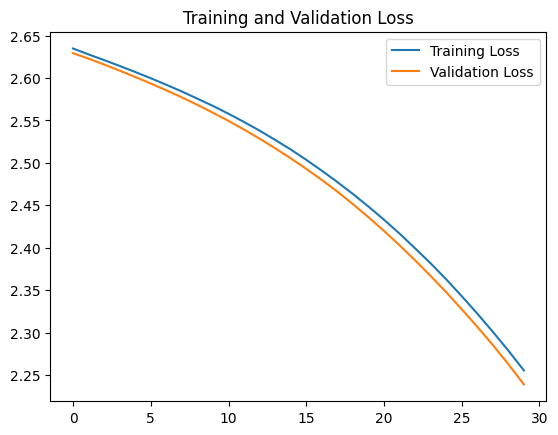

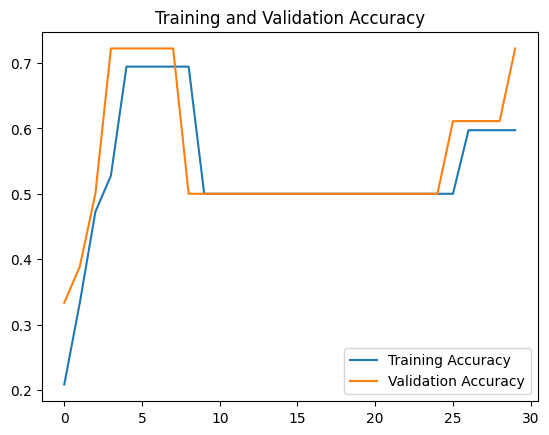

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

# Dataset
data = [
    {"id": 1, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 2, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 3, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 4, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 5, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 6, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 7, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 8, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 9, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 10, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"},
    {"id": 11, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 12, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 13, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 14, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 15, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 16, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 17, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 18, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 19, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 20, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"},
    {"id": 21, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 22, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 23, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 24, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 25, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 26, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 27, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 28, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 29, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 30, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"},
    {"id": 31, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 32, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 33, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 34, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 35, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 36, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 37, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 38, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 39, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 40, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"},
    {"id": 41, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 42, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 43, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 44, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 45, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 46, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 47, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 48, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 49, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 50, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"},
    {"id": 51, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 52, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 53, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 54, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 55, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 56, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 57, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 58, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 59, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 60, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"},
    {"id": 61, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 62, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 63, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 64, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 65, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 66, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 67, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 68, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 69, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 80, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"},
    {"id": 81, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 82, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 83, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 84, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 85, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 86, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 87, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 88, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 89, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 90, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"},
    {"id": 91, "question": "What is the capital of France?", "answer": "Paris"},
    {"id": 92, "question": "Who wrote 'To Kill a Mockingbird'?", "answer": "Harper Lee"},
    {"id": 93, "question": "What is the chemical symbol for water?", "answer": "H2O"},
    {"id": 94, "question": "How many continents are there on Earth?", "answer": "7"},
    {"id": 95, "question": "What is the largest planet in our solar system?", "answer": "Jupiter"},
    {"id": 96, "question": "What element does 'O' represent on the periodic table?", "answer": "Oxygen"},
    {"id": 97, "question": "What year did the first man land on the moon?", "answer": "1969"},
    {"id": 98, "question": "Who is known as the father of computing?", "answer": "Charles Babbage"},
    {"id": 99, "question": "What is the fastest land animal?", "answer": "Cheetah"},
    {"id": 100, "question": "What is the tallest mountain on Earth?", "answer": "Mount Everest"}
]

# Extract questions and answers
questions = [item['question'] for item in data]
answers = [item['answer'] for item in data]

# Tokenize questions
question_tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
question_tokenizer.fit_on_texts(questions)
question_sequences = question_tokenizer.texts_to_sequences(questions)
padded_questions = pad_sequences(question_sequences, padding='post')

# Tokenize answers
answer_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
answer_tokenizer.fit_on_texts(answers)
answer_sequences = answer_tokenizer.texts_to_sequences(answers)
padded_answers = pad_sequences(answer_sequences, padding='post', maxlen=1).squeeze()

# Model parameters
question_vocab_size = len(question_tokenizer.word_index) + 1
answer_vocab_size = len(answer_tokenizer.word_index) + 1
max_length = padded_questions.shape[1]

# Model definition
model = Sequential([
    Embedding(input_dim=question_vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(answer_vocab_size, activation='softmax')
])

# Model compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(padded_questions, padded_answers, epochs=30, validation_split=0.2)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
def predict_answer(question):
    # Preprocess the question
    seq = question_tokenizer.texts_to_sequences([question])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    
    # Make a prediction
    prediction = model.predict(padded)
    predicted_index = np.argmax(prediction, axis=1)[0]
    
    # Decode the predicted answer index to text
    predicted_answer = answer_tokenizer.sequences_to_texts([[predicted_index]])[0]
    
    return predicted_answer

# Setting up Gradio interface
iface = gr.Interface(fn=predict_answer, inputs="text", outputs="text", title="Simple QA Model")

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 108ms/step
